In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from matplotlib import cm
from sympy import symbols, diff

%matplotlib inline

In [2]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [3]:
# creatinf data for equation
x_new = np.linspace(start = -2, stop = 2, num =200)
y_new = np.linspace(start = -2, stop = 2 , num =200)


Text(0.5, 0.92, 'cost function vs X vs Y')

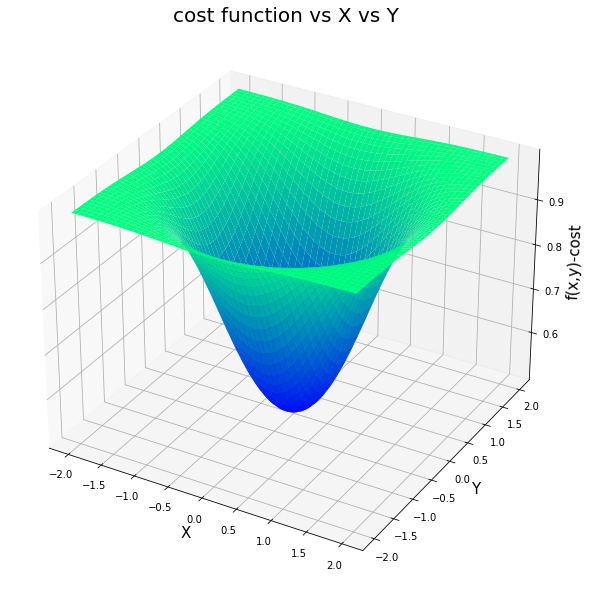

In [4]:
x_new, y_new = np.meshgrid(x_new, y_new)

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(x_new, y_new, f(x_new, y_new), cmap=cm.winter)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('f(x,y)-cost', fontsize=15)
ax.set_title('cost function vs X vs Y', fontsize = 20)

# Partial Derivatives and sympy (symbolic computation)

## $$ \frac{\partial f}{\partial x}= \frac{2x \ln (3) \cdot 3^{-x^2-y^2}} {\left( 3^{-x^2-y^2}+1 \right)^2} $$
## $$ \frac{\partial f}{\partial y}= \frac{2y \ln (3) \cdot 3^{-x^2-y^2}} {\left( 3^{-x^2-y^2}+1 \right)^2} $$

In [5]:
a, b = symbols('x, y')
print('out cost function f(x,y) is', f(a,b))
print('f(x,y) at points x=1.8, y=1 is', f(a,b).evalf(subs={a:1.8,b:1}))
print('partial diffrential of f(x,y) is', diff(f(a,b),b))
print('diff(f(a,b)) at points x=1.8, y=1 is', (diff(f(a,b),a).evalf(subs={a:1.8,b:1})))

out cost function f(x,y) is 1/(3**(-x**2 - y**2) + 1)
f(x,y) at points x=1.8, y=1 is 0.990604794032582
partial diffrential of f(x,y) is 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
diff(f(a,b)) at points x=1.8, y=1 is 0.0368089716197505


In [6]:
learning_rate = 0.1
precision = 0.001
max_iter = 200
params = np.array([1.8,1])
value_params = params.reshape(1,2)

for i in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    step_size_x = gradient_x * learning_rate
    step_size_y = gradient_y * learning_rate
    step_size = np.array([step_size_x, step_size_y])
    params = params - step_size
    
    value_params = np.append(value_params, params.reshape(1,2), 0) 
    
    if abs(step_size[0]) < precision and abs(step_size[1]) < precision:
        break
    

print(params[0])
print(params[1])
print(f(params[0], params[1]))


0.0167774307878613
0.00932079488214517
0.500101171039786


In [7]:
x_new, y_new = np.meshgrid(x_new, y_new)

fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(x_new, y_new, f(x_new, y_new), cmap=cm.winter)
ax.scatter(value_params[:,0], value_params[:,1], f(value_params[:,0], value_params[:,1]), cmap=cm.winter)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('f(x,y)-cost', fontsize=15)
ax.set_title('cost function vs X vs Y', fontsize = 20)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (40000, 40000) and data type float64